In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')
from statsmodels.tsa.stattools import coint

In [226]:
baserate=pd.read_csv("baserate - Sheet1.csv")
gdp=pd.read_csv("gdp final.csv")
cpih=pd.read_csv("CPIH annual rate - Sheet1.csv")
public_debt=pd.read_csv("public debt - Sheet1.csv")
tot_export=pd.read_csv("total trade_ export - Sheet1.csv")
tot_imports=pd.read_csv("total trade_ imports - Sheet1.csv")
tot_output=pd.read_csv("total output_ base year 2005 - Sheet1.csv")
tot_EU=pd.read_csv("total trade balance with EU - Sheet1.csv")
unemp=pd.read_csv("unemployment final 2.csv")
fuel_prices=pd.read_csv("petrol and diesel prices - Sheet1.csv")
#use fuel prices only for coint

In [227]:
dataframes = [baserate, gdp, cpih, public_debt, tot_export, tot_imports, tot_output, tot_EU, unemp, fuel_prices]

for df in dataframes:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)

In [228]:
tot_export.drop(tot_export.tail(1).index, inplace=True)
tot_export.shape

(26, 1)

In [229]:
tot_imports.drop(tot_imports.tail(1).index, inplace=True)
tot_imports.shape

(26, 1)

In [230]:
tot_balance=tot_export['TT: Exports']-tot_imports["TT: Imports"]
tot_balance=tot_balance.to_frame()
tot_balance = tot_balance.rename(columns={0: 'TT:Balance'})
tot_balance

,TT:Balance
Date,
2017-01-01,-6801
2017-04-01,-7625
2017-07-01,-6908
2017-10-01,-6591
2018-01-01,-7514
2018-04-01,-6198
2018-07-01,-5253
2018-10-01,-10789
2019-01-01,-27311


In [231]:
tot_output.drop(tot_output.tail(1).index, inplace=True)
tot_output.head()

,Total production
Date,
2017-01-01,94.3
2017-04-01,94.1
2017-07-01,95.5
2017-10-01,97.4
2018-01-01,99.1


In [232]:
tot_EU.drop(tot_EU.tail(1).index, inplace=True)
tot_EU.tail()

,total trade: EU
Date,
2022-04-01,-28096
2022-07-01,-23546
2022-10-01,-31068
2023-01-01,-33269
2023-04-01,-34786


In [233]:
unemp.tail()
unemp

,Unemployment (in 1000s)
Date,
2017-01-01,1284
2017-04-01,1258
2017-07-01,1325
2017-10-01,1240
2018-01-01,1231
2018-04-01,1172
2018-07-01,1276
2018-10-01,1154
2019-01-01,1107


In [234]:
fuel_prices = fuel_prices.resample('Q').sum()
fuel_prices = fuel_prices.resample('QS').first()
fuel_prices.drop(fuel_prices.tail(2).index, inplace=True)
fuel_prices.head()

,Petrol Price,Diesel price
Date,,
2018-01-01,28.40,29.537754
2018-04-01,23.77,24.606785
2018-07-01,23.51,24.287436
2018-10-01,28.42,29.696212
2019-01-01,23.86,25.041124


In [235]:
cpih = cpih.resample('Q').sum()
cpih = cpih.resample('QS').first()
cpih.drop(cpih.tail(2).index, inplace=True)
cpih.head()

,CPIH annual rate
Date,
2017-01-01,6.5
2017-04-01,7.9
2017-07-01,8.1
2017-10-01,8.3
2018-01-01,7.5


In [236]:
baserate = baserate.resample('Q').sum()
baserate = baserate.resample('QS').first()
baserate.drop(baserate.tail(1).index, inplace=True)
baserate.shape

(26, 1)

In [237]:
baserate.tail()

,Bank Rate
Date,
2022-04-01,3.00
2022-07-01,5.25
2022-10-01,8.75
2023-01-01,11.75
2023-04-01,13.75


In [238]:
baserate.dropna(inplace=True)

baserate.head()

,Bank Rate
Date,
2017-01-01,0.75
2017-04-01,0.75
2017-07-01,0.75
2017-10-01,1.25
2018-01-01,1.50


Cointegration 

In [239]:
public_debt = public_debt.resample('Q').sum()
public_debt = public_debt.resample('QS').first()
public_debt.tail()

,Public debt as a % of GDP
Date,
2022-10-01,287.1
2023-01-01,285.5
2023-04-01,289.4
2023-07-01,289.3
2023-10-01,97.8


In [240]:
gdp.tail()

,GDP
Date,
2022-07-01,-0.1
2022-10-01,0.1
2023-01-01,0.3
2023-04-01,0.2
2023-07-01,0.0


In [241]:
gdp1 = gdp['GDP'].astype(float)
public_debt1 = public_debt['Public debt as a % of GDP'].astype(float)

In [242]:
merged_data1 = pd.concat([gdp1, public_debt1], axis=1)
merged_data1.dropna(inplace=True)
merged_data1.shape

(27, 2)

In [243]:
result1 = coint(merged_data1['GDP'], merged_data1['Public debt as a % of GDP'], trend='c')
result1
#cointegrated First value (-inf): This indicates that the test statistic is less than the critical value at the 1% significance level, suggesting strong evidence to reject the null hypothesis of no cointegration. A negative infinity value typically suggests strong evidence of cointegration.
#Second value (0.0): This value usually represents the p-value associated with the test statistic. A p-value of 0.0 implies strong evidence against the null hypothesis, again indicating cointegration.
#Third value (array([-4.34805632, -3.5717894 , -3.20526262])): These are critical values at different levels of significance (e.g., 1%, 5%, and 10%) for the cointegration test. The test statistic is compared against these critical values to determine the evidence for cointegration. In this case, the test statistic is below all three critical values, further supporting the presence of cointegration.

(-7.295780061396598,
 1.6679956769553936e-09,
 array([-4.36726308, -3.58122704, -3.21159675]))

In [244]:
#coint export and import 
tot_export1 = tot_export['TT: Exports'].astype(float)
tot_imports1 = tot_imports['TT: Imports'].astype(float)

In [245]:
merged_data2 = pd.concat([tot_export1, tot_imports1], axis=1)
merged_data2.dropna(inplace=True)
merged_data2.shape

(26, 2)

In [246]:
tot_EU1=tot_EU['total trade: EU'].astype(float)

In [247]:
merged_data2["trade balance"]=merged_data2["TT: Exports"]-merged_data2["TT: Imports"]
merged_data2 = pd.concat([merged_data2, tot_EU1], axis=1)

In [248]:
merged_data2.head()

,TT: Exports,TT: Imports,trade balance,total trade: EU
Date,,,,
2017-01-01,157437.0,164238.0,-6801.0,-23072.0
2017-04-01,160435.0,168060.0,-7625.0,-23232.0
2017-07-01,163493.0,170401.0,-6908.0,-23489.0
2017-10-01,161921.0,168512.0,-6591.0,-23323.0
2018-01-01,165045.0,172559.0,-7514.0,-24306.0


In [249]:
result2 = coint(merged_data2['trade balance'], merged_data2["total trade: EU"], trend='c')
result2

(-3.5309165048824727,
 0.029751366857902212,
 array([-4.3881592, -3.5914508, -3.21845  ]))

In [250]:
#coint with total output ad unemployment
tot_output1 = tot_output['Total production '].astype(float)
unemp1 = unemp["Unemployment (in 1000s)"].astype(float)

In [251]:
merged_data3 = pd.concat([tot_output1, unemp1], axis=1)
merged_data3.dropna(inplace=True)
merged_data3.head()

,Total production,Unemployment (in 1000s)
Date,,
2017-01-01,94.3,1284.0
2017-04-01,94.1,1258.0
2017-07-01,95.5,1325.0
2017-10-01,97.4,1240.0
2018-01-01,99.1,1231.0


In [252]:
result3 = coint(merged_data3['Total production '], merged_data3["Unemployment (in 1000s)"], trend='c')
result3

(-3.5277552420957323,
 0.030012993514814436,
 array([-4.3881592, -3.5914508, -3.21845  ]))

In [253]:
#coint baserate and cpih
baserate1 = baserate['Bank Rate'].astype(float)
cpih1 = cpih['CPIH annual rate'].astype(float)

In [254]:
merged_data4 = pd.concat([baserate1, cpih1], axis=1)
merged_data4.dropna(inplace=True)
merged_data4.shape

(26, 2)

In [255]:
result4 = coint(merged_data4['Bank Rate'], merged_data4['CPIH annual rate'], trend='c')
result4

(-4.22784394331346,
 0.0033087969859652245,
 array([-4.3881592, -3.5914508, -3.21845  ]))

In [256]:
fuel_prices.columns

Index(['Petrol Price', 'Diesel price'], dtype='object')

In [257]:
#coint fuel prices and CPIH
merged_data5 = pd.concat([fuel_prices, cpih], axis=1)
merged_data5.dropna(inplace=True)
merged_data5.head()

,Petrol Price,Diesel price,CPIH annual rate
Date,,,
2018-01-01,28.40,29.537754,7.5
2018-04-01,23.77,24.606785,6.8
2018-07-01,23.51,24.287436,6.9
2018-10-01,28.42,29.696212,6.4
2019-01-01,23.86,25.041124,5.4


In [258]:
result5 = coint(merged_data5['Petrol Price'], merged_data5["CPIH annual rate"], trend='c')
result5
#no coint

(-1.1278960459959544,
 0.8757847980656022,
 array([-4.49398399, -3.6425588 , -3.25257971]))

In [259]:
result6 = coint(merged_data5['Diesel price'], merged_data5["CPIH annual rate"], trend='c')
result6
#no coint

(-1.0694457140682956,
 0.8888648536631649,
 array([-4.49398399, -3.6425588 , -3.25257971]))

VAR Model

In [277]:
dt = pd.concat([baserate, gdp, cpih, public_debt, tot_export, tot_imports, tot_output, tot_EU, unemp], axis=1)

In [278]:
dt.dropna(inplace=True)
dt

,Bank Rate,GDP,CPIH annual rate,Public debt as a % of GDP,TT: Exports,TT: Imports,Total production,total trade: EU,Unemployment (in 1000s)
Date,,,,,,,,,
2017-01-01,0.75,0.8,6.5,246.8,157437.0,164238.0,94.3,-23072.0,1284.0
2017-04-01,0.75,0.6,7.9,251.1,160435.0,168060.0,94.1,-23232.0,1258.0
2017-07-01,0.75,0.6,8.1,252.2,163493.0,170401.0,95.5,-23489.0,1325.0
2017-10-01,1.25,0.7,8.3,248.8,161921.0,168512.0,97.4,-23323.0,1240.0
2018-01-01,1.50,0.1,7.5,246.0,165045.0,172559.0,99.1,-24306.0,1231.0
2018-04-01,1.50,0.2,6.8,247.5,169107.0,175305.0,98.8,-23550.0,1172.0
2018-07-01,2.00,0.3,6.9,244.6,172777.0,178030.0,98.6,-20997.0,1276.0
2018-10-01,2.25,0.1,6.4,244.8,172771.0,183560.0,96.8,-24254.0,1154.0
2019-01-01,2.25,0.7,5.4,241.0,170081.0,197392.0,98.1,-26899.0,1107.0


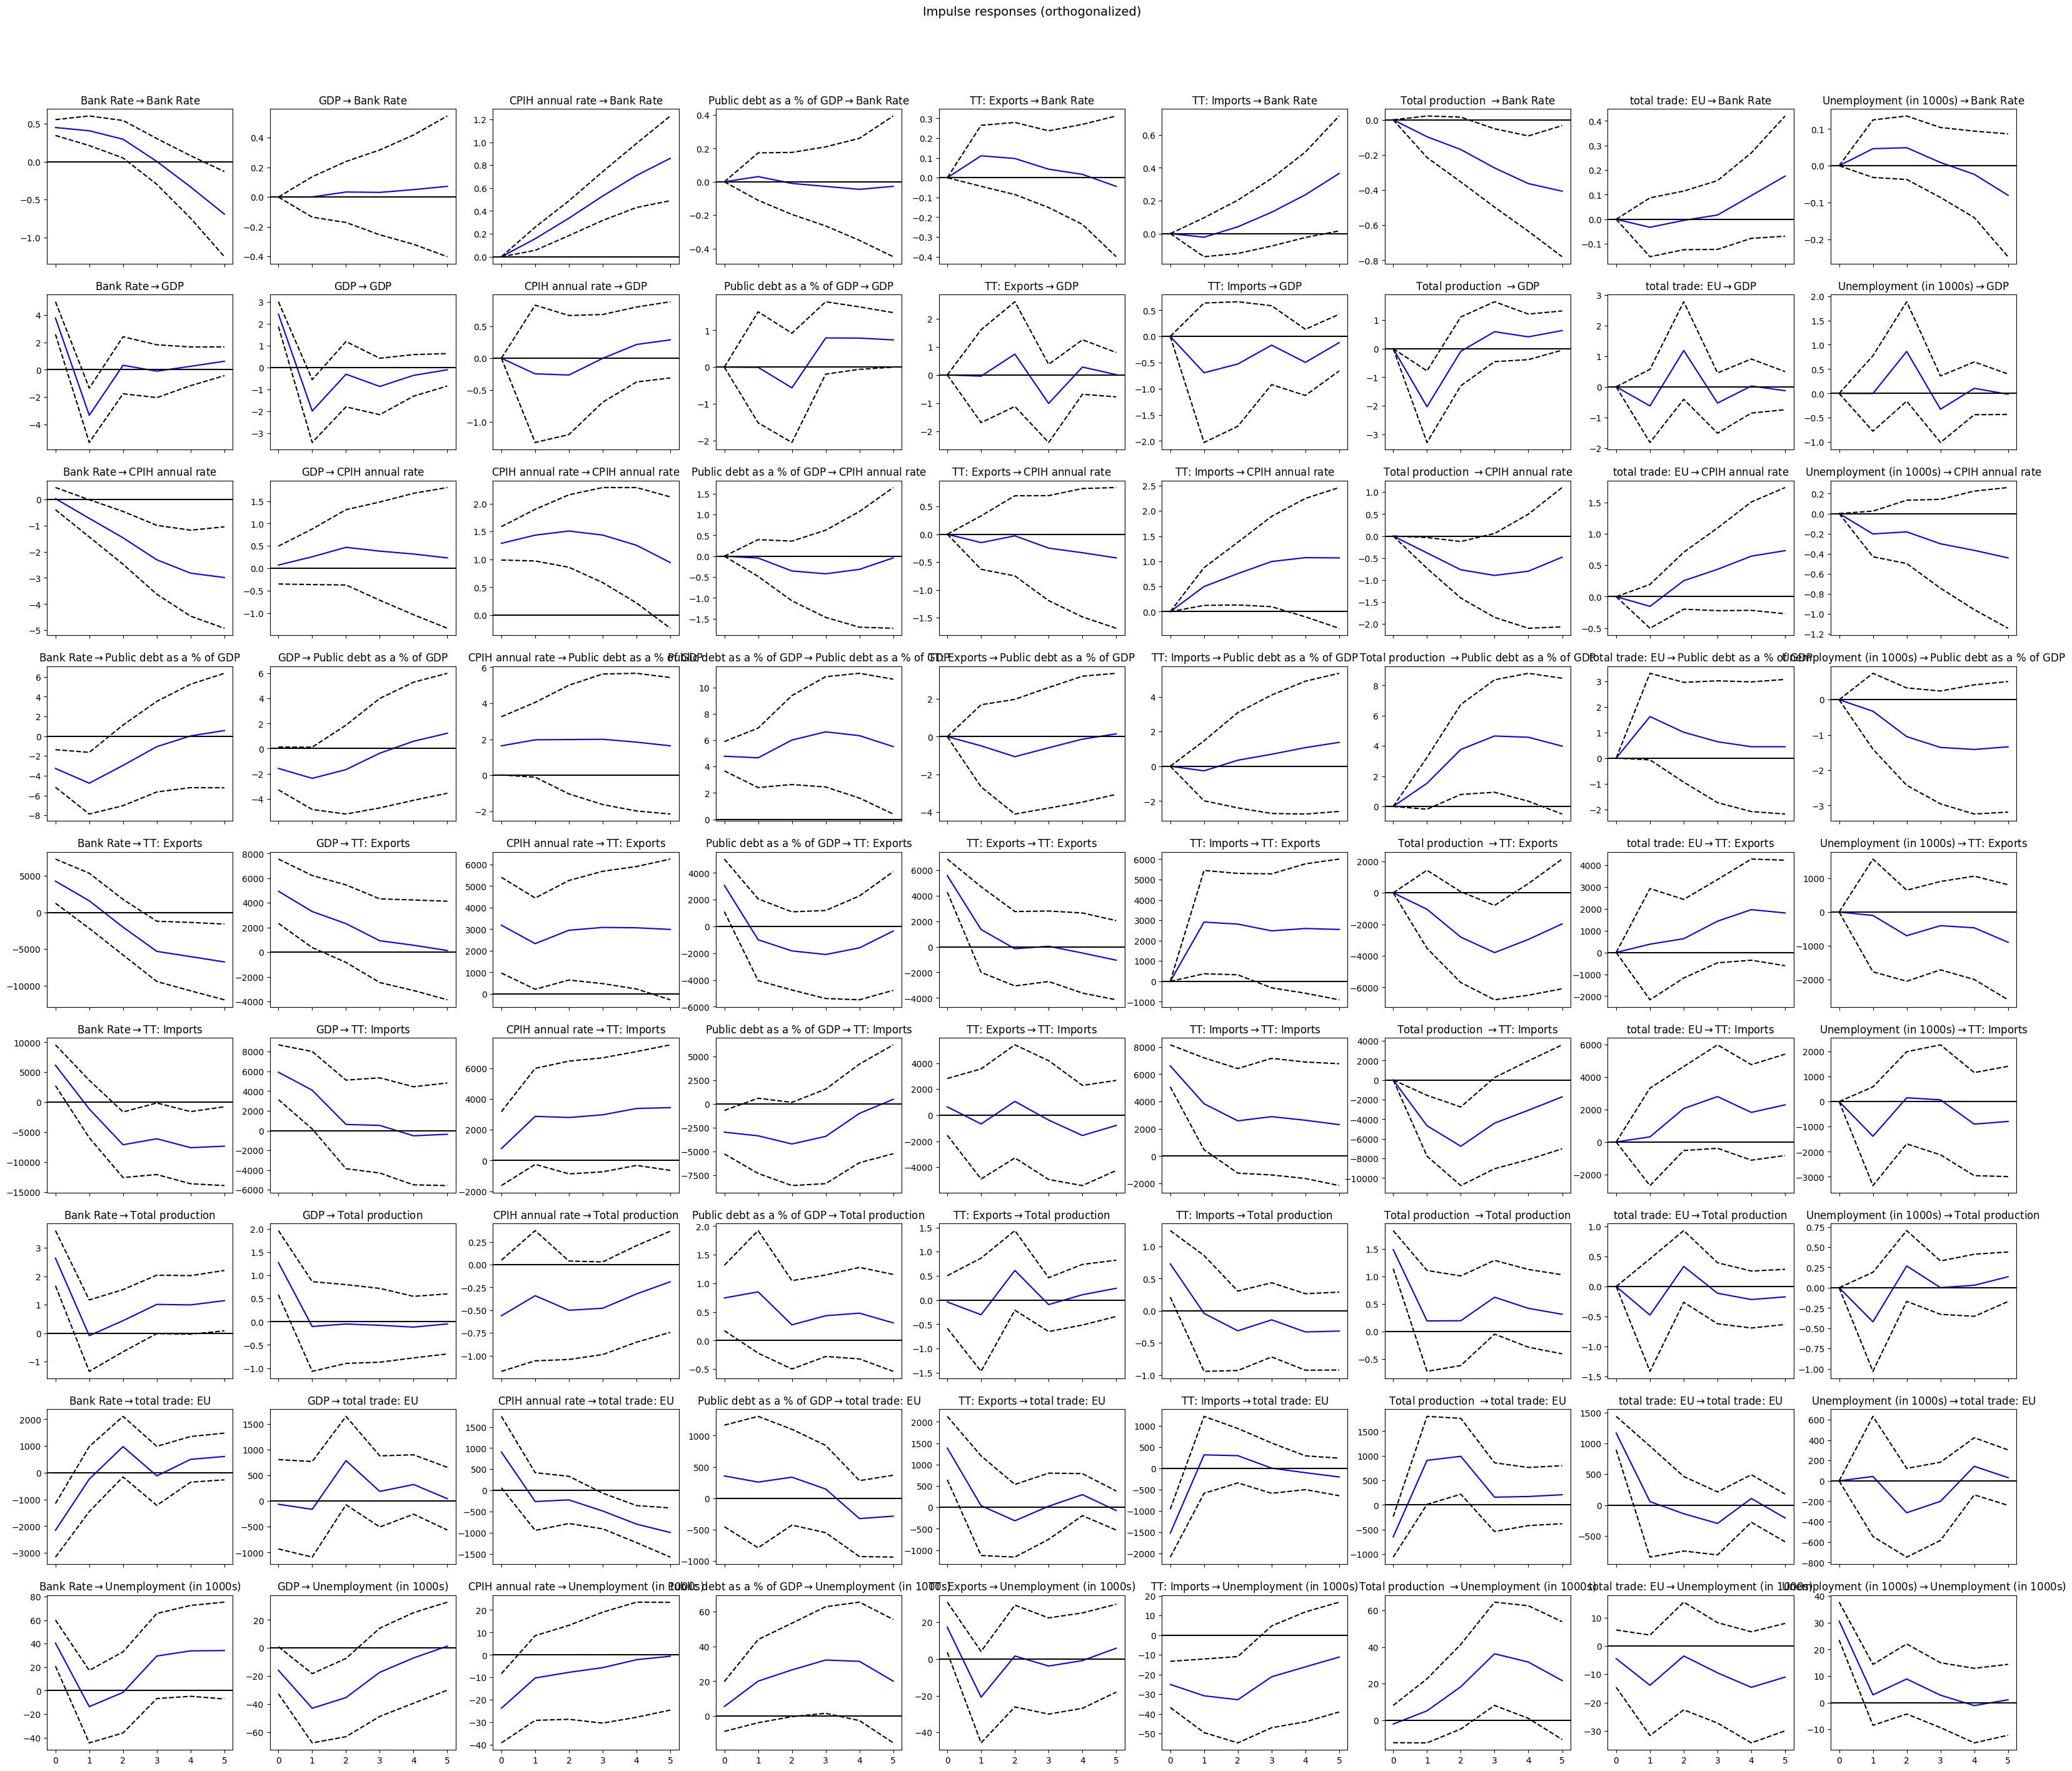

In [300]:
model_var = VAR(dt)
results_var = model_var.fit(1)
irf = results_var.irf(5)
fig = irf.plot(orth=True,signif=0.1)
fig.set_figwidth(35)  # Width of the figure
fig.set_figheight(30)  # Height of the figure

# Show the modified plot
plt.show()

In [280]:
#Factor Error Variance Decomposition for the above VAR model
fevd = results_var.fevd(12)
fevd.summary()

FEVD for Bank Rate
      Bank Rate       GDP  CPIH annual rate  Public debt as a % of GDP  TT: Exports  TT: Imports  Total production   total trade: EU  Unemployment (in 1000s)
0      1.000000  0.000000          0.000000                   0.000000     0.000000     0.000000           0.000000         0.000000                 0.000000
1      0.878375  0.000002          0.058882                   0.002327     0.029391     0.001155           0.022186         0.002512                 0.005170
2      0.686447  0.001741          0.208374                   0.001612     0.032841     0.003300           0.057165         0.001615                 0.006904
3      0.437387  0.002057          0.403326                   0.001756     0.022712     0.018306           0.108655         0.001325                 0.004475
4      0.304979  0.002495          0.497029                   0.002079     0.012864     0.040231           0.131788         0.005735                 0.002800
5      0.306076  0.002873        

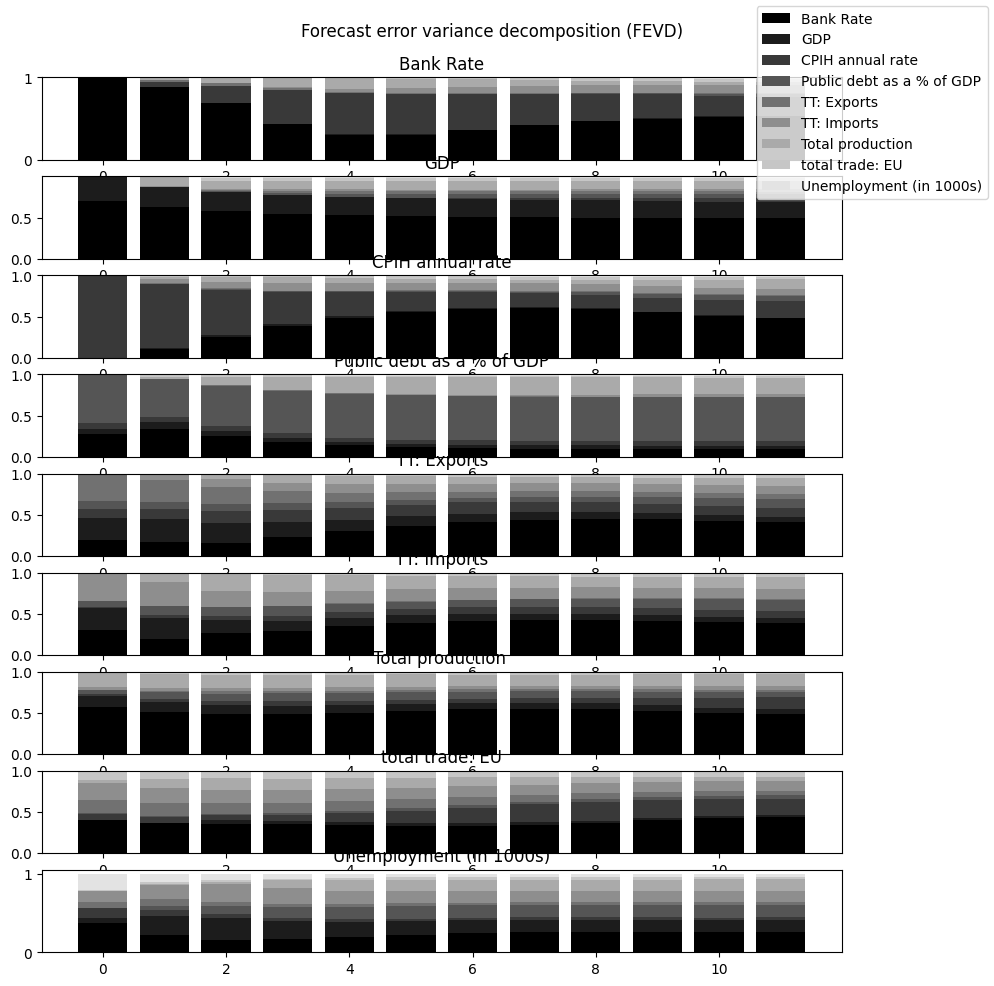

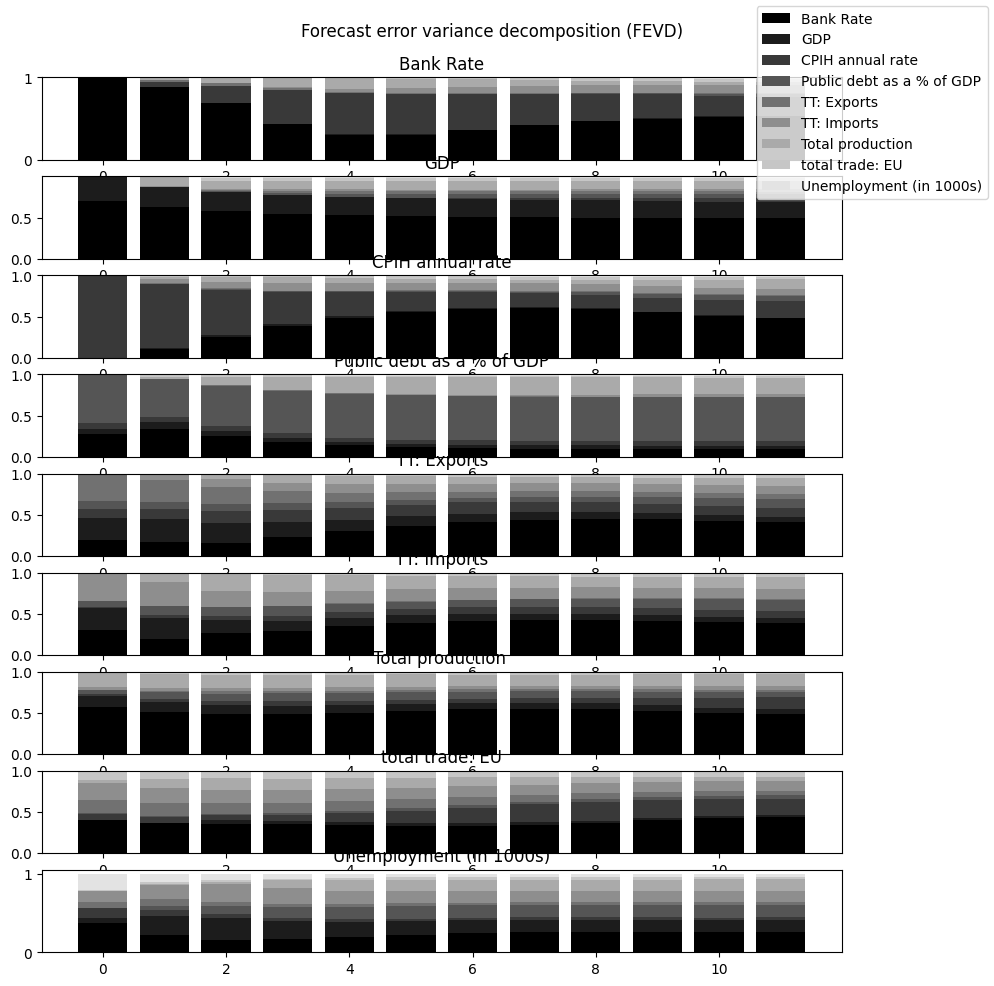

In [281]:
fevd.plot()

In [264]:
#Granger Causality
results_var.test_causality('Bank Rate', ['CPIH annual rate'], kind='f').summary()

Test statistic,Critical value,p-value,df
6.397,3.204,0.004,"(2, 45)"


In [265]:
results_var.test_causality('CPIH annual rate', ['Bank Rate'], kind='f').summary()

Test statistic,Critical value,p-value,df
3.685,3.204,0.033,"(2, 45)"


In [283]:
results_var.test_causality('GDP', ['Bank Rate'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.01181,3.911,0.914,"(1, 135)"


In [286]:
results_var.test_causality('Bank Rate', ['GDP'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.004454,3.911,0.947,"(1, 135)"


In [284]:
results_var.test_causality('Public debt as a % of GDP', ['CPIH annual rate'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.214,3.911,0.272,"(1, 135)"


In [285]:
results_var.test_causality('CPIH annual rate', ['Public debt as a % of GDP'], kind='f').summary()

Test statistic,Critical value,p-value,df
16.98,3.911,0.000,"(1, 135)"


In [288]:
results_var.test_causality('total trade: EU', ['TT: Exports'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.001383,3.911,0.970,"(1, 135)"


In [289]:
results_var.test_causality('total trade: EU', ['TT: Imports'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.0009699,3.911,0.975,"(1, 135)"


In [290]:
results_var.test_causality('TT: Exports', ['total trade: EU'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.05143,3.911,0.821,"(1, 135)"


In [291]:
results_var.test_causality('TT: Imports', ['TT: Exports'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.05529,3.911,0.814,"(1, 135)"


In [292]:
results_var.test_causality('TT: Exports', ['TT: Imports'], kind='f').summary()

Test statistic,Critical value,p-value,df
2.095,3.911,0.150,"(1, 135)"


In [293]:
results_var.test_causality('Total production ', ['Unemployment (in 1000s)'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.316,3.911,0.253,"(1, 135)"


In [294]:
results_var.test_causality('Unemployment (in 1000s)', ['Total production '], kind='f').summary()

Test statistic,Critical value,p-value,df
0.04035,3.911,0.841,"(1, 135)"


In [295]:
results_var.test_causality('Bank Rate', ['total trade: EU'], kind='f').summary()

Test statistic,Critical value,p-value,df
0.1174,3.911,0.732,"(1, 135)"


In [296]:
results_var.test_causality('total trade: EU', ['Bank Rate'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.581,3.911,0.211,"(1, 135)"


In [297]:
results_var.test_causality('total trade: EU', ["GDP"], kind='f').summary()

Test statistic,Critical value,p-value,df
4.422,3.911,0.037,"(1, 135)"


In [298]:
results_var.test_causality('GDP', ["total trade: EU"], kind='f').summary()

Test statistic,Critical value,p-value,df
0.6942,3.911,0.406,"(1, 135)"
